## Machine Learning using Python

Machine learning is often categorized as a subfield of artificial intelligence. It's more helpful to think of machine learning as a means of building models of data.
<br><br>
Machine learning involves building mathematical models to help understand data. "Learning" enters the fray when we give these models tunable parameters that can be adapted to observed data; in this way the program can be considered to be "learning" from the data. Once these models have been fit to previously seen data, they can be used to predict and understand aspects of newly observed data.

### Categories of Machine Learning

#### Supervised Learning
Basically supervised learning is a learning in which we teach or train the machine using data which is well labeled that means some data is already tagged with correct answer. After that, machine is provided with new set of examples(data) so that supervised learning algorithm analyses the training data(set of training examples) and produces an correct outcome from labeled data. It's further classified into:
1. Regression
2. Classification

#### Unsupervised Learning
Unsupervised learning is the training of machine using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance. Here the task of machine is to group unsorted information according to similarities, patterns and differences without any prior training of data. Its further classified into:
1. Clustering
2. Association

For the purposes of this meetup, we'll be focusing on some Supervised Learning models.

### Multiple Linear Regression

Multiple linear regression (MLR), also known simply as multiple regression, is a statistical technique that uses several explanatory variables to predict the outcome of a response variable. The goal of multiple linear regression (MLR) is to model the linear relationship between the explanatory (independent) variables and response (dependent) variable.
![alt text](MLR.png "Formula")

Now, let us dive into the data.

In [13]:
import numpy
import pandas
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [14]:
# Import the dataset
dataset = pandas.read_csv('winequality-red.csv', sep = ';')
x = dataset.iloc[:, :-1].values #Predictors/features
y = dataset.iloc[:, -1].values # Target

# Split the dataset into the training set and test set
# We're splitting the data in 1/3
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 1/3, random_state = 42)

In [15]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [16]:
sorted(dataset['quality'].unique())

[3, 4, 5, 6, 7, 8]

In [17]:
#Target Variable
dataset.iloc[:, -1].head()

0    5
1    5
2    5
3    6
4    5
Name: quality, dtype: int64

In [18]:
#Predictor Variables
dataset.iloc[:, :-1].head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


#### Correlation Matrix

In [19]:
data_col = dataset.columns

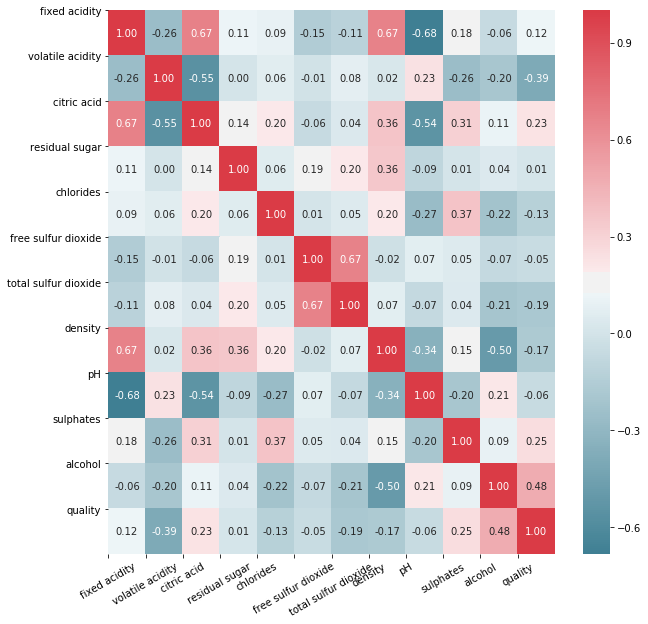

In [20]:
#Create Correlation df
corr = dataset[list(data_col)].corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(10, 10))
#Generate Color Map, red & blue
colormap = sns.diverging_palette(220, 10, as_cmap=True)
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns, rotation=30);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

#### Model Training:

In [21]:
linearRegressor = LinearRegression()
linearRegressor.fit(xTrain, yTrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
yPrediction = linearRegressor.predict(xTest)

#### Model Evaluation:

In [23]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print('Coefficients: \n', linearRegressor.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(yTest, yPrediction))
# MAE
print('MAE score: %.2f' % mean_absolute_error(yTest, yPrediction))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(yTest, yPrediction))

Coefficients: 
 [ 1.64350670e-02 -1.04543551e+00 -2.13245527e-01  1.80616966e-02
 -1.69881923e+00  3.28468124e-03 -3.01518543e-03 -1.92223391e+01
 -3.52689553e-01  7.80541134e-01  2.91161683e-01]
Mean squared error: 0.42
MAE score: 0.51
Variance score: 0.36


## Desicion Trees

Decision tree builds classification or regression models in the form of a tree structure. It breaks down a data set into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes. A decision node has two or more branches. Leaf node represents a classification or decision. The topmost decision node in a tree which corresponds to the best predictor called root node. Decision trees can handle both categorical and numerical data.

![alt text](decisiontree.gif "Decision Tree Example")
(image source:www.towardsdatascience.com)

### How does it work?

#### Spitting
The process of partitioning the data set into subsets. Splits are formed on a particular variable

#### Tree Selection
The process of finding the smallest tree that fits the data.

#### Pruning
The shortening of branches of the tree. Pruning is the process of reducing the size of the tree by turning some branch nodes into leaf nodes, and removing the leaf nodes under the original branch. This is done to avoid over-fitting so that the mode is able to handle new values appropriately.

#### Important points to note
1. <b>Entropy</b>: A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogeneous). If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one.
2. <b>Information gain</b>: The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).

Let us look at a telecom dataset for our analysis. This historical data consist of 39,859 customers: 19,901 customers that churned (i.e., left the company) and 19,958 that did not churn (see the `"churndep"` variable). Here are the data set's 11 possible predictor variables for churning behavior: 

```
Pos.  Var. Name  Var. Description
----- ---------- --------------------------------------------------------------
1     revenue    Mean monthly revenue in dollars
2     outcalls   Mean number of outbound voice calls
3     incalls    Mean number of inbound voice calls
4     months     Months in Service
5     eqpdays    Number of days the customer has had his/her current equipment
6     webcap     Handset is web capable
7     marryyes   Married (1=Yes; 0=No)
8     travel     Has traveled to non-US country (1=Yes; 0=No)
9     pcown      Owns a personal computer (1=Yes; 0=No)
10    creditcd   Possesses a credit card (1=Yes; 0=No)
11    retcalls   Number of calls previously made to retention team
```

The 12th column, the dependent variable `"churndep"`, equals 1 if the customer churned, and 0 otherwise. 

In [2]:
import numpy as np
import pandas as pd

In [3]:
col_names = ['revenue', 'outcalls', 'incalls', 'months', 'eqpdays', 'webcap', 'marryyes', 'travel', 'pcown', 'creditcd', 'retcalls', 'churndep']
customer_data = pd.read_csv('cell2cell_data.csv', names=col_names)
customer_data.head()

,revenue,outcalls,incalls,months,eqpdays,webcap,marryyes,travel,pcown,creditcd,retcalls,churndep
0,48.82,10.00,3.0,26,780,0,0,0,0,1,4,1
1,83.53,20.00,1.0,31,745,1,0,0,0,0,4,1
2,29.99,0.00,0.0,52,1441,0,0,0,1,1,3,1
3,51.42,0.00,0.0,36,59,1,0,0,0,0,4,1
4,37.75,2.67,0.0,25,572,0,0,0,1,1,3,1


Let us split our dataset randomly into training(80%) and test(20%) dataset

In [4]:
num_rows = len(customer_data)

test_elements = np.sort(np.random.choice(range(num_rows), size=int(np.ceil(0.2*num_rows)), replace=False))
train_elements = list(set(customer_data.index) - set(test_elements))

test_df = customer_data.take(test_elements)
# train_df = customer_data.drop(customer_data.index[test_df.index])
train_df = customer_data.take(train_elements)

Let us create a new Decision Tree Model.

In [5]:
from sklearn.tree import DecisionTreeClassifier
decisionTree_inst = DecisionTreeClassifier(criterion='entropy')

train = train_df.drop('churndep', axis = 1)
target = train_df['churndep']
decisionTree_inst.fit(train, target)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Now, we'll look at the important features in our data.

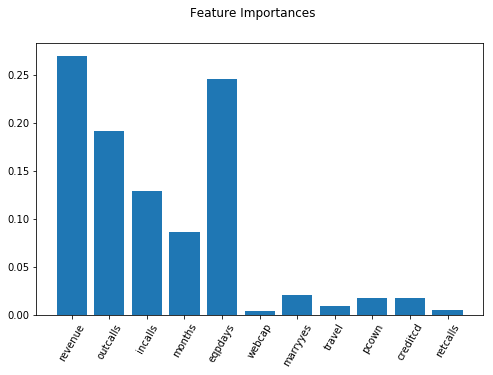

In [10]:
import matplotlib.pyplot as plt

feature_importances = decisionTree_inst.feature_importances_
feature_names = train.columns.values

fig, a = plt.subplots(1, figsize=(8, 5))
fig.suptitle('Feature Importances')

# plotting the feature importances
a.bar(range(len(feature_importances)), height=feature_importances)
a.set_xticks(np.arange(len(feature_importances)))
a.set_xticklabels(feature_names, rotation = 60)

plt.show()

In [11]:
imp_features = sorted(zip(feature_importances, feature_names), reverse=True)
imp_features_3 = [x[1] for x in imp_features[:3]]
print('Three most important features are: ', imp_features_3)

Three most important features are:  ['revenue', 'eqpdays', 'outcalls']


Now lets look at the correlation between these variables

In [12]:
imp_features_3.append('churndep')
customer_data_corr = customer_data.corr()

for feature in feature_names:
    if feature not in imp_features_3:
        customer_data_corr.drop(feature, inplace= True)
        customer_data_corr.drop(feature, inplace= True, axis= 1)

customer_data_corr

,revenue,outcalls,eqpdays,churndep
revenue,1.000000,0.500870,-0.221958,-0.013566
outcalls,0.500870,1.000000,-0.243999,-0.037233
eqpdays,-0.221958,-0.243999,1.000000,0.112731
churndep,-0.013566,-0.037233,0.112731,1.000000


In [13]:
from sklearn.metrics import accuracy_score

Let's create a function that fits our model to the data and gets accuracy vaules.

In [14]:
def getPredictionAccuracy(data, target, decisionTree_inst):
    """
    A function that takes in dataset, target variable and returns
    prediction and accuracy values based on the Decision Tree instance
    provided.
    """
    prediction = decisionTree_inst.predict(data)
    accuracy = accuracy_score(target, prediction)
    return prediction, accuracy

Now, we'll look at the accuracy that we get using the default configurations.

In [15]:
test = test_df.drop('churndep', axis = 1)
target_test = test_df['churndep']

# Preparing train dataset for prediction
train = train_df.drop('churndep', axis = 1)
target_train = train_df['churndep']

prediction_train, accuracy_train = getPredictionAccuracy(train, target_train, decisionTree_inst)
prediction_test, accuracy_test = getPredictionAccuracy(test, target_test, decisionTree_inst)

print('Accuracy on train data = ', accuracy_train*100, '%')
print('Whereas accuracy on test data = ', accuracy_test*100, '%')

Accuracy on train data =  99.98431962868881 %
Whereas accuracy on test data =  53.88861013547416 %


Now, we'll try and improve the performance by tuning some of the parameters for decision trees. This is a regular practice in a Data Scientist's routine.

In [36]:
min_split = [pow(10, i) for i in range(1, 6, 2)]
min_leaf = [pow(5, i) for i in range(1, 6, 2)]
print('Range for min_samples_split: ', min_split)
print()
print('Range for min_samples_leaf: ', min_leaf)

Range for min_samples_split:  [10, 1000, 100000]

Range for min_samples_leaf:  [5, 125, 3125]


In [37]:
from itertools import product

In [43]:
"""
Creating new classifiers and checking their accuracy 
for each combination of min_samples_split and min_samples_leaf.
"""
# Preparing test dataset for prediction
test = test_df.drop('churndep', axis = 1)
target_test = test_df['churndep']

# Preparing train dataset for prediction
train = train_df.drop('churndep', axis = 1)
target_train = train_df['churndep']

accuracy_max = 0
split_best = 0
leaf_best = 0
accuracy_all = []

# creating all combinations of values in the chosen ranges
combinations = product(min_split, min_leaf)

for sample_split, sample_leaf in combinations:
    new_decisionTree_inst = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = sample_split, min_samples_leaf = sample_leaf)
    new_decisionTree_inst.fit(train, target_train)
    
    prediction_test, accuracy_test = getPredictionAccuracy(test, target_test, new_decisionTree_inst)
    
#     storing all accuracies for plotting
    accuracy_all.append(accuracy_test)
    
#     storing max accuracy
    if accuracy_test >= accuracy_max:
        accuracy_max, split_best, leaf_best = accuracy_test, sample_split, sample_leaf

print("Best accurary =", round(accuracy_max*100, 2), "%")
print("With minimum samples for split as:", int(round(split_best)))
print("And minimun samples in a leaf as:", int(round(leaf_best)))

Best accurary = 59.01 %
With minimum samples for split as: 1000
And minimun samples in a leaf as: 3125
